In [1]:
import pandas as pd 
import numpy as np 
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt 
import seaborn as sb 

In [40]:
df = pd.read_csv('./Data/CardioGoodFitness.csv')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]


## No missing values - Imputation not necessary
## Some correlations need to be explored
## Some linear relationships between variables

In [5]:
def outliers(df):
    for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        percent = v_col.shape[0] * 100.0 / df.shape[0]
        print("Column %s outliers = %.2f%%" % (k, percent))
outliers(df[["Income", "Miles"]])

Column Income outliers = 10.56%
Column Miles outliers = 7.22%


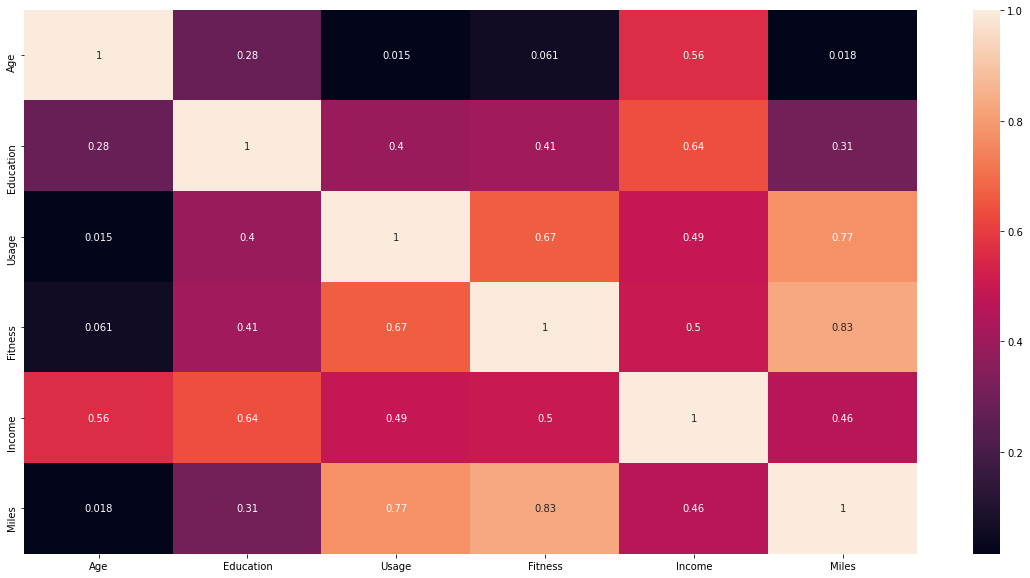

In [39]:
plt.figure(figsize=(20, 10))
sb.heatmap(df.corr(),  annot=True);
plt.savefig("Correlation_Matrix")

### Weak positive correlation between Education and Income, Fitness and Usage, and Usage and Miles

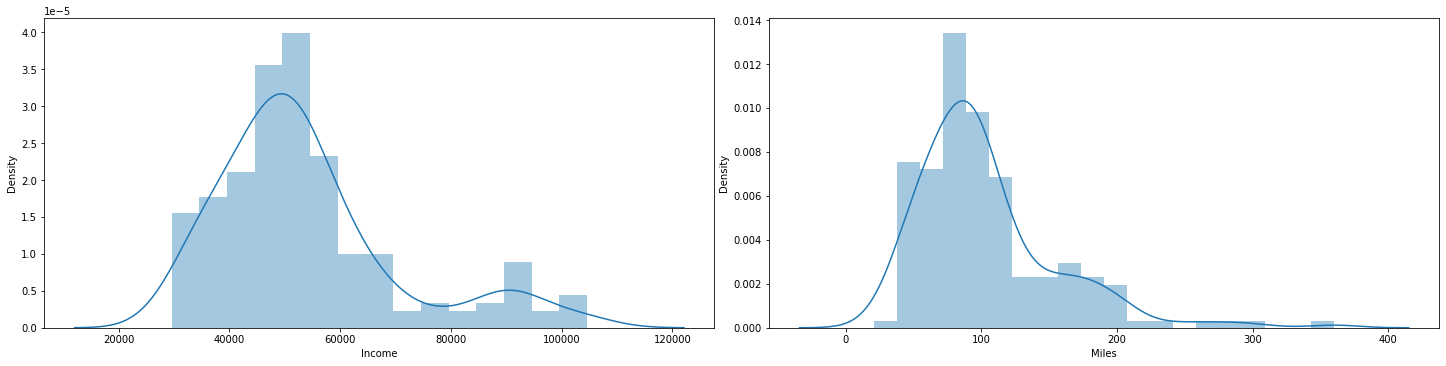

In [41]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))
index = 0
axs = axs.flatten()
for k,v in df[["Income", "Miles"]].items():
        sb.distplot(v, ax=axs[index])
        index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.savefig("skew_scalars")

### Right Skew, Log Transform

In [42]:
df["Income"] = np.log1p(df["Income"])
df["Miles"] = np.log1p(df["Miles"])

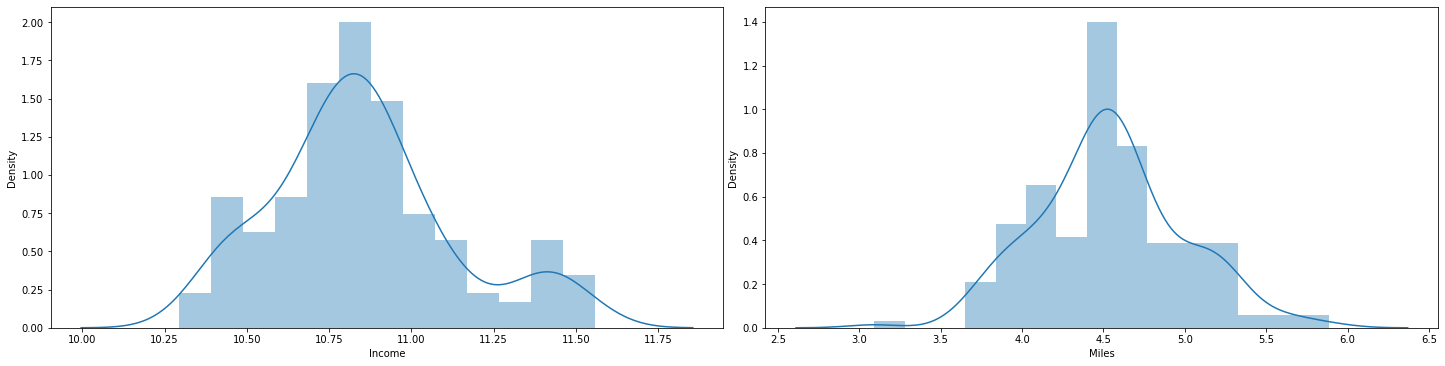

In [43]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))
index = 0
axs = axs.flatten()
for k,v in df[["Income", "Miles"]].items():
        sb.distplot(v, ax=axs[index])
        index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.savefig("log_scalars")

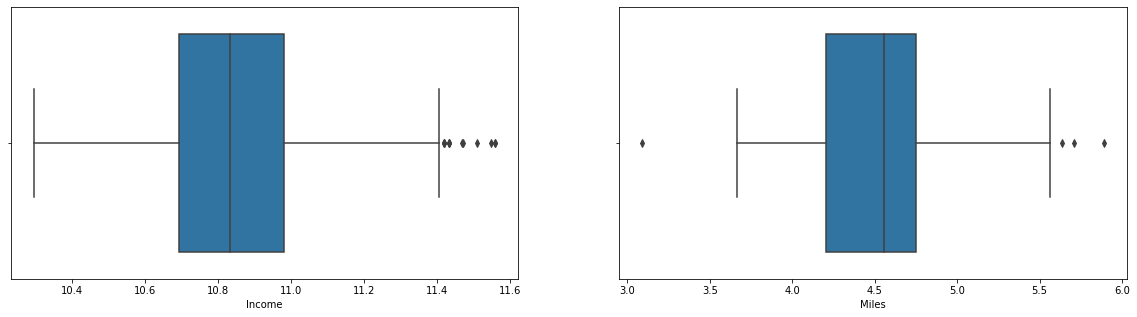

In [44]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))
index = 0
axs = axs.flatten()
for k,v in df[["Income", "Miles"]].items():
    sb.boxplot(x=k, data=df, ax=axs[index])
    plt.xlabel(k)
    index += 1
plt.savefig("Boxplots")

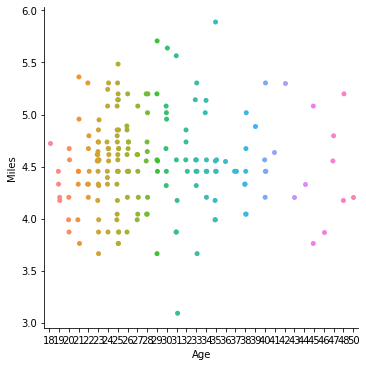

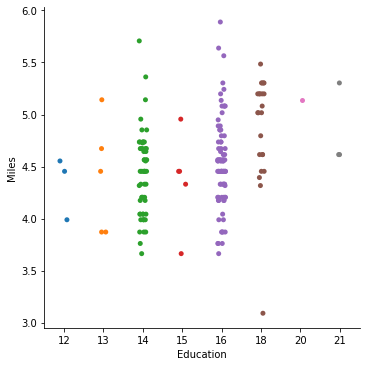

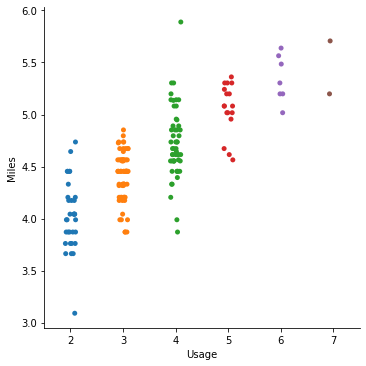

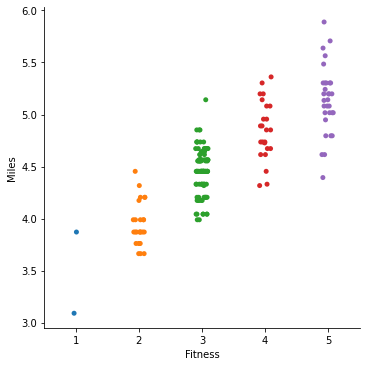

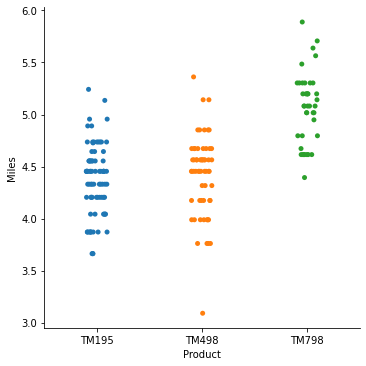

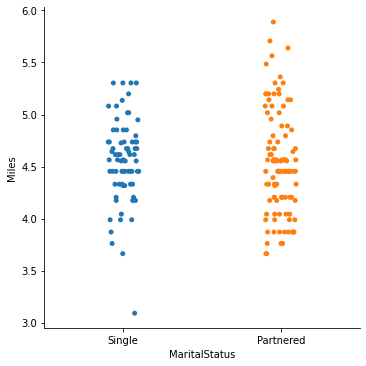

In [45]:
for k,v in df[["Age", "Education", "Usage", "Fitness", "Product", "MaritalStatus"]].items():
    sb.catplot(x=k, y="Miles", data=df,)
    index += 1
    plt.savefig(k+"_miles")

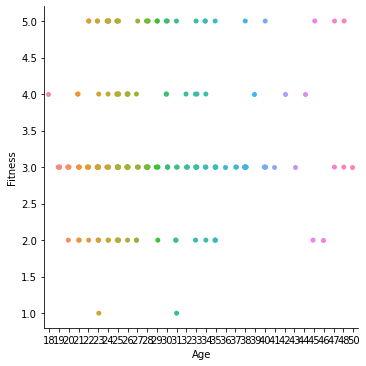

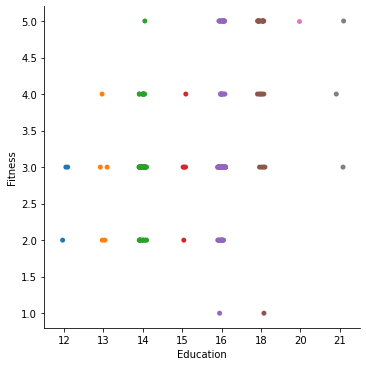

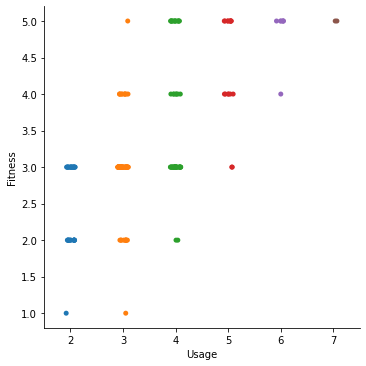

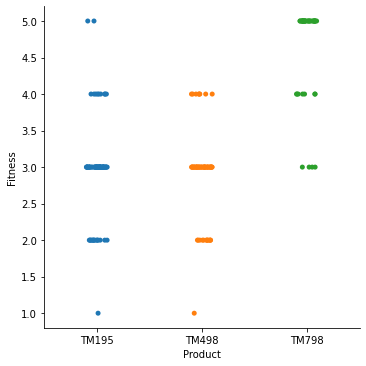

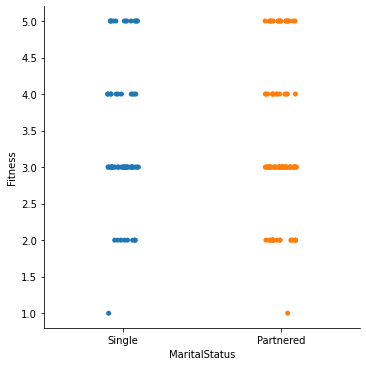

In [46]:
for k,v in df[["Age", "Education", "Usage", "Product", "MaritalStatus"]].items():
    sb.catplot(x=k, y="Fitness", data=df,)
    index += 1
    plt.savefig(k+"_fitness")

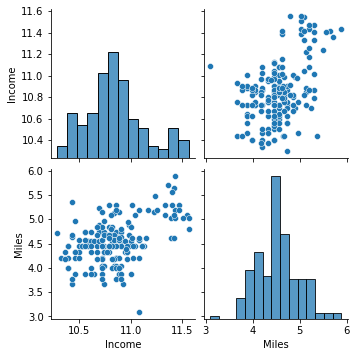

In [47]:
sb.pairplot(data = df[["Income", "Miles"]]);
plt.savefig("scalar_matrix")

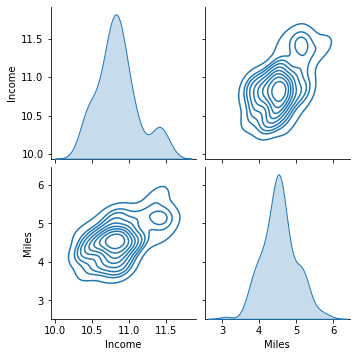

In [48]:
sb.pairplot(data = df[["Income", "Miles"]], kind="kde");
plt.savefig("scalar_kde")

### Positive linear relationship between Usage, Fitness, Income, Education and Miles
### TM798 logs more miles and has more fit individuals than the other products
### Partnered people log more miles than single people
### Education have positive linear relationship with Fitness